In [140]:
# 1. Packages
#Let’s first import all the packages that you will need during this assignment.

  #  numpy is the main package for scientific computing with Python.
  #  matplotlib is a library to plot graphs in Python.
   # dnn_utils provides some necessary functions for this notebook.
  #  testCases provides some test cases to assess the correctness of your functions
  #  np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don’t change the seed.

import numpy as np
import h5py
import matplotlib.pyplot as plt
#from testCases_v3 import *
#from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0); # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
#the sigmoid function:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1 / (1 + np.exp(-Z));
    cache = Z;

    return A, cache;

In [142]:
#the sigmoid_backward function:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache;

    s = 1 / (1 + np.exp(-Z));
    dZ = dA * s * (1 - s);

    assert (dZ.shape == Z.shape);

    return dZ;

In [143]:
# the relu function:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z);

    assert(A.shape == Z.shape);

    cache = Z; 
    return A, cache;

In [144]:
#the relu_backward function：
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache;
    dZ = np.array(dA, copy = True); # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0;

    assert (dZ.shape == Z.shape);

    return dZ;

In [145]:
#3.1 2-layer Neural Network
# The model’s structure is: LINEAR -> RELU -> LINEAR -> SIGMOID.
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1);

    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01;
    b1 = np.zeros((n_h, 1));
    W2 = np.random.randn(n_y, n_h) * 0.01;
    b2 = np.zeros((n_y, 1));
    ### END CODE HERE ###

    assert(W1.shape == (n_h, n_x));
    assert(b1.shape == (n_h, 1));
    assert(W2.shape == (n_y, n_h));
    assert(b2.shape == (n_y, 1));

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2};

    return parameters;

In [146]:
#parameters = initialize_parameters(3,2,1);
#print("W1 = " + str(parameters["W1"]));
#print("b1 = " + str(parameters["b1"]));
#print("W2 = " + str(parameters["W2"]));
#print("b2 = " + str(parameters["b2"]));

In [147]:
#3.2 L-layer Neural Network

# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3);
    parameters = {};
    L = len(layer_dims);     # number of layers in the network

#    if L == 1:
#parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0])*0.01
#parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
#else
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01;
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1));
        ### END CODE HERE ###

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]));
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1));


    return parameters;

In [148]:
#parameters = initialize_parameters_deep([5,4,3]);
#print("W1 = " + str(parameters["W1"]));
#print("b1 = " + str(parameters["b1"]));
#print("W2 = " + str(parameters["W2"]));
#print("b2 = " + str(parameters["b2"]));

In [149]:
#4.1 Linear Forward
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b;
    ### END CODE HERE ###

    assert(Z.shape == (W.shape[0], A.shape[1]));
    cache = (A, W, b);

    return Z, cache;

In [150]:
#def linear_forward_test_case():
 #   np.random.seed(1);
  #  A = np.random.randn(3,2);
   # W = np.random.randn(1,3);
    #b = np.random.randn(1,1);
    #return A, W, b;

In [151]:
#A, W, b = linear_forward_test_case();
#Z, linear_cache = linear_forward(A, W, b);
#print("Z = " + str(Z));

In [152]:
#4.2 Linear-Activation Forward
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b); # Z, (W, A_prev, B)
        A, activation_cache = sigmoid(Z); # A, (Z)
        ### END CODE HERE ###

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b); 
        A, activation_cache = relu(Z);
        ### END CODE HERE ###

    assert (A.shape == (W.shape[0], A_prev.shape[1]));
    cache = (linear_cache, activation_cache); #, ((W, A_prev, B) ,(Z))

    return A, cache;

In [153]:
#def linear_activation_forward_test_case():
 #   np.random.seed(2)
  #  A_prev = np.random.randn(3,2)
   # W = np.random.randn(1,3)
    #b = np.random.randn(1,1)
    #return A_prev, W, b

In [154]:
#A_prev, W, b = linear_activation_forward_test_case();

#A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid");
#print("With sigmoid: A = " + str(A));

#A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu");
#print("With ReLU: A = " + str(A));

In [312]:
#4.3 L-Layer Model
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, linear_activation_cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu");
        caches.append(linear_activation_cache);
        ### END CODE HERE ###

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, linear_activation_cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid");
    caches.append(linear_activation_cache);
    ### END CODE HERE ###

  #  assert(AL.shape == (1,X.shape[1]));
    
    return AL, caches;

In [156]:
#def L_model_forward_test_case():
 #   np.random.seed(1);
  #  X = np.random.randn(4,2);
   # W1 = np.random.randn(3,4);
    #b1 = np.random.randn(3,1);
    #W2 = np.random.randn(1,3);
    #b2 = np.random.randn(1,1);
    #parameters = {"W1": W1,
     #             "b1": b1,
      #            "W2": W2,
       #           "b2": b2};

    #return X, parameters;

In [157]:
#X, parameters = L_model_forward_test_case();
#AL, caches = L_model_forward(X, parameters);
#print("AL = " + str(AL));
#print("Length of caches list = " + str(len(caches)));

In [374]:
#5. Cost function
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1];

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1 / m * (np.dot(Y, np.log(AL).T) + np.dot(1 - Y, np.log(1 - AL).T));
    ### END CODE HERE ###
    
   # cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
   # assert(cost.shape == ())
    
    return cost;

In [375]:
def compute_cost_test_case(): 
    Y = np.asarray([[1, 1, 1]]);
    aL = np.array([[.8,.9,0.4]]); 
    return Y, aL;

In [376]:
Y, AL = compute_cost_test_case();
print("cost = " + str(compute_cost(AL, Y)));

cost = [[0.4149316]]


In [161]:
#6.1 Linear backward
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache;
    m = A_prev.shape[1];

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1 / m * np.dot(dZ, A_prev.T);
    db = 1 / m * np.sum(dZ, axis = 1, keepdims = True);
    dA_prev = np.dot(W.T, dZ);
    ### END CODE HERE ###

    assert (dA_prev.shape == A_prev.shape);
    assert (dW.shape == W.shape);
    assert (db.shape == b.shape);

    return dA_prev, dW, db;

In [163]:
#def linear_backward_test_case():
  #  np.random.seed(1);
   # dZ = np.random.randn(1,2);
    #A = np.random.randn(3,2);
    #W = np.random.randn(1,3);
    #b = np.random.randn(1,1);
    #linear_cache = (A, W, b);
    #return dZ, linear_cache;

In [164]:
# Set up some test inputs
#dZ, linear_cache = linear_backward_test_case();
#dA_prev, dW, db = linear_backward(dZ, linear_cache);
#print ("dA_prev = "+ str(dA_prev));
#print ("dW = " + str(dW));
#print ("db = " + str(db));

In [165]:
#6.2 Linear-Activation backward
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    linear_cache, activation_cache = cache

    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache);
        dA_prev, dW, db = linear_backward(dZ, linear_cache);
        ### END CODE HERE ###

    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache);
        dA_prev, dW, db = linear_backward(dZ, linear_cache);
        ### END CODE HERE ###

    return dA_prev, dW, db;

In [166]:
#def linear_activation_backward_test_case():
 #   np.random.seed(2);
  #  dA = np.random.randn(1,2);
   # A = np.random.randn(3,2);
   # W = np.random.randn(1,3);
   # b = np.random.randn(1,1);
   # Z = np.random.randn(1,2);
   # linear_cache = (A, W, b);
  #  activation_cache = Z;
  #  linear_activation_cache = (linear_cache, activation_cache);

  #  return dA, linear_activation_cache;

In [167]:
#AL, linear_activation_cache = linear_activation_backward_test_case();

#dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid");
#print ("sigmoid:");
#print ("dA_prev = "+ str(dA_prev));
#print ("dW = " + str(dW));
#print ("db = " + str(db) + "\n");

#dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu");
##print ("relu:");
#print ("dA_prev = "+ str(dA_prev));
#print ("dW = " + str(dW));
#print ("db = " + str(db));

In [168]:
#6.3 L-Model Backward
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {};
    L = len(caches); # the number of layers
    m = AL.shape[1];
    Y = Y.reshape(AL.shape); # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL));
    ### END CODE HERE ###

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    dA_prev, dW, db = linear_activation_backward(dAL, caches[L - 1], "sigmoid");
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db;
    ### END CODE HERE ###

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        dA = dA_prev;
        dA_prev, dW, db = linear_activation_backward(dA, caches[l], "relu");
        grads["dA" + str(l + 1)] = dA_prev;
        grads["dW" + str(l + 1)] = dW;
        grads["db" + str(l + 1)] = db;
        ### END CODE HERE ###

    return grads;

In [172]:
#def L_model_backward_test_case():
 #   """
  #  X = np.random.rand(3,2)
   # Y = np.array([[1, 1]])
    #parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    #aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
     #      [ 0.02738759,  0.67046751],
      #     [ 0.4173048 ,  0.55868983]]),
    #np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
  #  np.array([[ 0.]])),
 #  np.array([[ 0.41791293,  1.91720367]]))])
  # """
 #   np.random.seed(3)
 #   AL = np.random.randn(1, 2)
 #   Y = np.array([[1, 0]])

 #   A1 = np.random.randn(4,2)
 #   W1 = np.random.randn(3,4)
 #   b1 = np.random.randn(3,1)
 #   Z1 = np.random.randn(3,2)
  #  linear_cache_activation_1 = ((A1, W1, b1), Z1)

  #  A2 = np.random.randn(3,2)
  #  W2 = np.random.randn(1,3)
  #  b2 = np.random.randn(1,1)
  #  Z2 = np.random.randn(1,2)
  #  linear_cache_activation_2 = ((A2, W2, b2), Z2)

  #  caches = (linear_cache_activation_1, linear_cache_activation_2)

  #  return AL, Y, caches

In [173]:
#AL, Y_assess, caches = L_model_backward_test_case();
#grads = L_model_backward(AL, Y_assess, caches);
#print(grads);

In [174]:
#6.4 Update Parameters
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)];
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)];
    ### END CODE HERE ###
    return parameters;


In [175]:
#def update_parameters_test_case():
 #   np.random.seed(2)
  #  W1 = np.random.randn(3,4)
   # b1 = np.random.randn(3,1)
 #   W2 = np.random.randn(1,3)
  #  b2 = np.random.randn(1,1)
  #  parameters = {"W1": W1,
   #               "b1": b1,
  #                "W2": W2,
  #                "b2": b2}
 #   np.random.seed(3)
 #   dW1 = np.random.randn(3,4)
  #  db1 = np.random.randn(3,1)
 #   dW2 = np.random.randn(1,3)
  #  db2 = np.random.randn(1,1)
  #  grads = {"dW1": dW1,
  #           "db1": db1,
    #         "dW2": dW2,
    #         "db2": db2}

   # return parameters, grads

In [176]:
#parameters, grads = update_parameters_test_case();
#parameters = update_parameters(parameters, grads, 0.1);

#print ("W1 = "+ str(parameters["W1"]));
#print ("b1 = "+ str(parameters["b1"]));
#print ("W2 = "+ str(parameters["W2"]));
#print ("b2 = "+ str(parameters["b2"]));

In [177]:
import pandas as pd
from scipy.stats import zscore
from sklearn import metrics
p = pd.read_csv(r"C:\Users\Admin\Desktop\PHY TESTER\PYTHON\dataset\csv.csv") # to read file

In [178]:
p.head() # to see the first 5 lines of the dataset

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,udp,other,SF,146,0,0,13,1,0.0,0.0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,tcp,private,S0,0,0,0,123,6,1.0,1.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS
3,tcp,http,SF,232,8153,1,5,5,0.2,0.2,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,tcp,http,SF,199,420,1,30,32,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [179]:
print("Read {} rows.".format(len(p)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
p.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

Read 35 rows.


In [180]:
print(p)

   protocol_type     service flag  src_bytes  dst_bytes  logged_in  count  \
0            tcp    ftp_data   SF        491          0          0      2   
1            udp       other   SF        146          0          0     13   
2            tcp     private   S0          0          0          0    123   
3            tcp        http   SF        232       8153          1      5   
4            tcp        http   SF        199        420          1     30   
5            tcp     private  REJ          0          0          0    121   
6            tcp     private   S0          0          0          0    166   
7            tcp     private   S0          0          0          0    117   
8            tcp  remote_job   S0          0          0          0    270   
9            tcp     private   S0          0          0          0    133   
10           tcp     private  REJ          0          0          0    205   
11           tcp     private   S0          0          0          0    199   

In [182]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(p):
    print()
    cols = p.columns.values
    total = float(len(p))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = p[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(p[col])))
            expand_categories(p[col])

In [183]:
# Encode a numeric column as zscores
def encode_numeric_zscore(p, name, mean=None, sd=None):
    if mean is None:
        mean = p[name].mean()

    if sd is None:
        sd = p[name].std()

    p[name] = (p[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(p, name):
    dummies = pd.get_dummies(p[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        p[dummy_name] = dummies[x]
    p.drop(name, axis=1, inplace=True)


In [184]:
# Now encode the feature vector

encode_text_dummy(p, 'protocol_type')
encode_text_dummy(p, 'service')
encode_text_dummy(p, 'flag')
encode_numeric_zscore(p, 'src_bytes')
encode_numeric_zscore(p, 'dst_bytes')
encode_numeric_zscore(p, 'logged_in')
encode_numeric_zscore(p, 'count')
encode_numeric_zscore(p, 'srv_count')
encode_numeric_zscore(p, 'serror_rate')
encode_numeric_zscore(p, 'srv_serror_rate')
encode_numeric_zscore(p, 'rerror_rate')
encode_numeric_zscore(p, 'srv_rerror_rate')
encode_numeric_zscore(p, 'same_srv_rate')
encode_numeric_zscore(p, 'diff_srv_rate')
encode_numeric_zscore(p, 'srv_diff_host_rate')
encode_numeric_zscore(p, 'dst_host_count')
encode_numeric_zscore(p, 'dst_host_srv_count')
encode_numeric_zscore(p, 'dst_host_same_srv_rate')
encode_numeric_zscore(p, 'dst_host_diff_srv_rate')
encode_numeric_zscore(p, 'dst_host_same_src_port_rate')
encode_numeric_zscore(p, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(p, 'dst_host_serror_rate')
encode_numeric_zscore(p, 'dst_host_srv_serror_rate')
encode_numeric_zscore(p, 'dst_host_rerror_rate')
encode_numeric_zscore(p, 'dst_host_srv_rerror_rate')

# display 5 rows

p.dropna(inplace=True,axis=1)
p[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = p.columns.drop('class')
x = p[x_columns].values
dummies = pd.get_dummies(p['class']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [185]:
p.groupby('class')['class'].count()

class
DOS       16
normal    19
Name: class, dtype: int64

In [186]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 26 samples, validate on 9 samples
Epoch 1/1000
26/26 - 0s - loss: 0.6933 - val_loss: 0.6927
Epoch 2/1000
26/26 - 0s - loss: 0.6929 - val_loss: 0.6922
Epoch 3/1000
26/26 - 0s - loss: 0.6924 - val_loss: 0.6917
Epoch 4/1000
26/26 - 0s - loss: 0.6920 - val_loss: 0.6912
Epoch 5/1000
26/26 - 0s - loss: 0.6916 - val_loss: 0.6907
Epoch 6/1000
26/26 - 0s - loss: 0.6912 - val_loss: 0.6902
Epoch 7/1000
26/26 - 0s - loss: 0.6908 - val_loss: 0.6897
Epoch 8/1000
26/26 - 0s - loss: 0.6904 - val_loss: 0.6891
Epoch 9/1000
26/26 - 0s - loss: 0.6899 - val_loss: 0.6885
Epoch 10/1000
26/26 - 0s - loss: 0.6894 - val_loss: 0.6878
Epoch 11/1000
26/26 - 0s - loss: 0.6888 - val_loss: 0.6871
Epoch 12/1000
26/26 - 0s - loss: 0.6882 - val_loss: 0.6862
Epoch 13/1000
26/26 - 0s - loss: 0.6875 - val_loss: 0.6853
Epoch 14/1000
26/26 - 0s - loss: 0.6867 - val_loss: 0.6843
Epoch 15/1000
26/26 - 0s - loss: 0.6858 - val_loss: 0.6832
Epoch 16/1000
26/26 - 0s - loss: 0.6849 - val_loss: 0.6820
Epoch 17/1000
26/26 - 

In [94]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 1.0


In [381]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 18 samples, validate on 6 samples
Epoch 1/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6933
Epoch 2/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6934
Epoch 3/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6933
Epoch 4/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6932
Epoch 5/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 6/1000
18/18 - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 00006: early stopping


In [96]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.5555555555555556


In [382]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 18 samples, validate on 6 samples
Epoch 1/1000
18/18 - 0s - loss: 0.6938 - val_loss: 0.6936
Epoch 2/1000
18/18 - 0s - loss: 0.6928 - val_loss: 0.6920
Epoch 3/1000
18/18 - 0s - loss: 0.6917 - val_loss: 0.6905
Epoch 4/1000
18/18 - 0s - loss: 0.6907 - val_loss: 0.6893
Epoch 5/1000
18/18 - 0s - loss: 0.6897 - val_loss: 0.6884
Epoch 6/1000
18/18 - 0s - loss: 0.6885 - val_loss: 0.6875
Epoch 7/1000
18/18 - 0s - loss: 0.6872 - val_loss: 0.6865
Epoch 8/1000
18/18 - 0s - loss: 0.6858 - val_loss: 0.6851
Epoch 9/1000
18/18 - 0s - loss: 0.6842 - val_loss: 0.6834
Epoch 10/1000
18/18 - 0s - loss: 0.6823 - val_loss: 0.6813
Epoch 11/1000
18/18 - 0s - loss: 0.6802 - val_loss: 0.6788
Epoch 12/1000
18/18 - 0s - loss: 0.6777 - val_loss: 0.6761
Epoch 13/1000
18/18 - 0s - loss: 0.6749 - val_loss: 0.6731
Epoch 14/1000
18/18 - 0s - loss: 0.6717 - val_loss: 0.6698
Epoch 15/1000
18/18 - 0s - loss: 0.6681 - val_loss: 0.6661
Epoch 16/1000
18/18 - 0s - loss: 0.6639 - val_loss: 0.6620
Epoch 17/1000
18/18 - 

In [98]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 1.0


In [99]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 26 samples, validate on 9 samples
Epoch 1/1000
26/26 - 0s - loss: 0.6929 - val_loss: 0.6924
Epoch 2/1000
26/26 - 0s - loss: 0.6927 - val_loss: 0.6921
Epoch 3/1000
26/26 - 0s - loss: 0.6924 - val_loss: 0.6918
Epoch 4/1000
26/26 - 0s - loss: 0.6922 - val_loss: 0.6914
Epoch 5/1000
26/26 - 0s - loss: 0.6919 - val_loss: 0.6911
Epoch 6/1000
26/26 - 0s - loss: 0.6916 - val_loss: 0.6907
Epoch 7/1000
26/26 - 0s - loss: 0.6913 - val_loss: 0.6903
Epoch 8/1000
26/26 - 0s - loss: 0.6910 - val_loss: 0.6899
Epoch 9/1000
26/26 - 0s - loss: 0.6907 - val_loss: 0.6895
Epoch 10/1000
26/26 - 0s - loss: 0.6904 - val_loss: 0.6890
Epoch 11/1000
26/26 - 0s - loss: 0.6900 - val_loss: 0.6886
Epoch 12/1000
26/26 - 0s - loss: 0.6896 - val_loss: 0.6880
Epoch 13/1000
26/26 - 0s - loss: 0.6892 - val_loss: 0.6875
Epoch 14/1000
26/26 - 0s - loss: 0.6887 - val_loss: 0.6869
Epoch 15/1000
26/26 - 0s - loss: 0.6882 - val_loss: 0.6862
Epoch 16/1000
26/26 - 0s - loss: 0.6877 - val_loss: 0.6855
Epoch 17/1000
26/26 - 

In [100]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 1.0


In [103]:
#Deep NEUral N Application with dataset
#1. Packages
import numpy as np;
import h5py;
import matplotlib.pyplot as plt;
#from testCases_v3 import *;
#from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward;

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0); # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest';
plt.rcParams['image.cmap'] = 'gray';

%load_ext autoreload
%autoreload 2

np.random.seed(1);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
print ("x_train's shape: " + str(x_train.shape));
print ("x_test's shape: " + str(x_test.shape));
print ("y_train's shape: " + str(y_train.shape));
print ("y_test's shape: " + str(y_test.shape));

train_x= (x_train).T
train_y= (y_train).T
test_x= (x_test).T
test_y= (y_test).T


print ("train_x's shape: " + str(train_x.shape));
print ("test_x's shape: " + str(test_x.shape));
print ("train_y's shape: " + str(train_y.shape));
print ("test_y's shape: " + str(test_y.shape));



x_train's shape: (26, 39)
x_test's shape: (9, 39)
y_train's shape: (26, 2)
y_test's shape: (9, 2)
train_x's shape: (39, 26)
test_x's shape: (39, 9)
train_y's shape: (2, 26)
test_y's shape: (2, 9)


In [319]:
### CONSTANTS DEFINING THE MODEL ####
n_x = train_x.shape[0];    #number of features
n_h = 9;
n_y = 2;
layers_dims = (n_x, n_h, n_y);

In [390]:
#GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples) # rows/ features & number of training examples 25,26
    Y -- true "label" vector (containing 0 if DOS, 1 if NORMAL), of shape (1, number of examples)(1,26)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1);
    grads = {};
    costs = [];                              # to keep track of the cost
    m = X.shape[1];                           # number of examples
    (n_x, n_h, n_y) = layers_dims;

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y);
    ### END CODE HERE ###

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"];
    b1 = parameters["b1"];
    W2 = parameters["W2"];
    b2 = parameters["b2"];

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu");
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid");
        ### END CODE HERE ###

        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y);
      #  print("cost = " + str(cost));        ### END CODE HERE ###

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2));

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid");
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu");
        ### END CODE HERE ###

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1;
        grads['db1'] = db1;
        grads['dW2'] = dW2;
        grads['db2'] = db2;

        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate);
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"];
        b1 = parameters["b1"];
        W2 = parameters["W2"];
        b2 = parameters["b2"];

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
           # print ("Cost after iteration %i: %f" %(i, cost));
        if print_cost and i % 100 == 0:
            costs.append(cost);
    #    if print_cost and i % 100 == 0:
            #print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
     #                   print ("Cost after iteration %i: %f" %(i, cost))
      #  if print_cost and i % 100 == 0:
       #     costs.append(cost)

 #   # plot the cost

   #plt.plot(np.squeeze(cost));
      #plt.ylabel('cost');
#plt.xlabel('iterations (per tens)');
 #   plt.title("Learning rate =" + str(learning_rate));
  #  plt.show();

    return parameters;

In [394]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_cost = True);

Cost after iteration 0: [[0.69331464 0.69312096]
 [0.69297981 0.69317357]]
Cost after iteration 100: [[0.69179433 0.69559537]
 [0.69467769 0.69086814]]
Cost after iteration 200: [[0.68766933 0.70135947]
 [0.69922647 0.68551646]]
Cost after iteration 300: [[0.66806792 0.72486203]
 [0.71995403 0.66332687]]
Cost after iteration 400: [[0.58337437 0.83084185]
 [0.81986085 0.57489204]]
Cost after iteration 500: [[0.38176189 1.20087631]
 [1.18044901 0.37362857]]
Cost after iteration 600: [[0.20943342 1.83738283]
 [1.81335752 0.20549388]]
Cost after iteration 700: [[0.1262404  2.443094  ]
 [2.42085836 0.12444179]]
Cost after iteration 800: [[0.08224229 2.93462325]
 [2.91478716 0.08129174]]
Cost after iteration 900: [[0.05590308 3.33411261]
 [3.31625823 0.05533794]]
Cost after iteration 1000: [[0.03974819 3.66375681]
 [3.64745418 0.03938279]]
Cost after iteration 1100: [[0.02964279 3.93954569]
 [3.92446539 0.02939049]]
Cost after iteration 1200: [[0.02306721 4.17372454]
 [4.1596243  0.02288352]

In [380]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [323]:
predictions_train = predict(train_x, train_y, parameters);

Accuracy: 1.0


In [315]:
predictions_test = predict(test_x, test_y, parameters);

Accuracy: 1.0


In [404]:
layers_dims = [train_x.shape[0], 50, 25, 10, 2] #  5-layer model

In [405]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims);
    ### END CODE HERE ###

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches =L_model_forward(X, parameters);
        ### END CODE HERE ###

        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y);
        ### END CODE HERE ###

        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches);
        ### END CODE HERE ###

        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate);
        ### END CODE HERE ###

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
           # print ("Cost after iteration %i: %f" %(i, cost));
            if print_cost and i % 100 == 0:
                costs.append(cost);

    # plot the cost
    plt.plot(np.squeeze(costs));
    plt.ylabel('cost');
    plt.xlabel('iterations (per tens)');
    plt.title("Learning rate =" + str(learning_rate));
    plt.show();

    return parameters;

Cost after iteration 0: [[0.69314763 0.6931474 ]
 [0.69314673 0.69314696]]
Cost after iteration 100: [[0.69222085 0.69424669]
 [0.69424683 0.69222098]]
Cost after iteration 200: [[0.69158463 0.69528923]
 [0.69528939 0.69158476]]
Cost after iteration 300: [[0.69114744 0.69624366]
 [0.69624383 0.69114758]]
Cost after iteration 400: [[0.69084696 0.69709687]
 [0.69709706 0.6908471 ]]
Cost after iteration 500: [[0.69064041 0.69784686]
 [0.69784706 0.69064054]]
Cost after iteration 600: [[0.69049838 0.698498  ]
 [0.69849822 0.69049851]]
Cost after iteration 700: [[0.69040071 0.69905809]
 [0.69905833 0.69040083]]
Cost after iteration 800: [[0.69033353 0.69953642]
 [0.69953668 0.69033364]]
Cost after iteration 900: [[0.69028731 0.69994268]
 [0.69994292 0.69028741]]
Cost after iteration 1000: [[0.69025551 0.7002862 ]
 [0.70028643 0.6902556 ]]
Cost after iteration 1100: [[0.69023363 0.70057566]
 [0.70057587 0.69023371]]
Cost after iteration 1200: [[0.69021857 0.70081888]
 [0.70081907 0.69021865]

ValueError: x and y can be no greater than 2-D, but have shapes (50,) and (50, 2, 2)

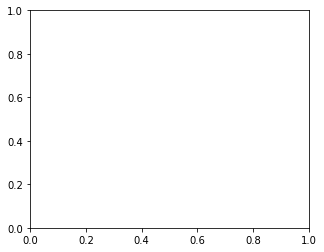

In [406]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations =5000, print_cost = True);

In [328]:
pred_train = predict(train_x, train_y, parameters);

Accuracy: 1.0


In [329]:
pred_test = predict(test_x, test_y, parameters);

Accuracy: 1.0
